In [77]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [78]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [79]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [80]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [81]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [82]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [83]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [84]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [85]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [86]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [87]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [88]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [89]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:34,  3.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


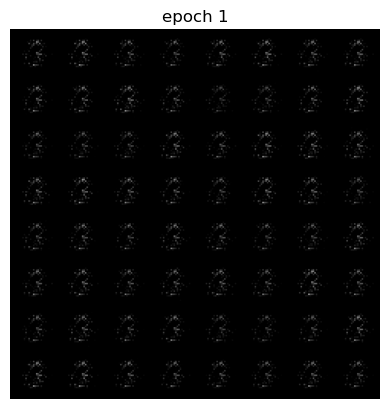

Epoch 1 of 100
Generator loss: 1.34963613, Discriminator loss: 0.89851183


118it [00:35,  3.29it/s]                         


Epoch 2 of 100
Generator loss: 2.10935983, Discriminator loss: 1.43368431


118it [00:36,  3.20it/s]                         


Epoch 3 of 100
Generator loss: 5.32683852, Discriminator loss: 0.33763049


118it [00:35,  3.29it/s]                         


Epoch 4 of 100
Generator loss: 1.61757263, Discriminator loss: 1.38530053


118it [00:36,  3.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


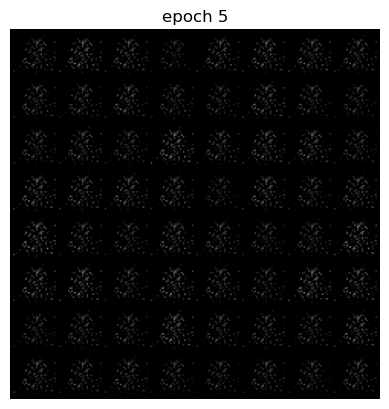

Epoch 5 of 100
Generator loss: 2.13807668, Discriminator loss: 1.00264021


118it [00:36,  3.19it/s]                         


Epoch 6 of 100
Generator loss: 0.77341082, Discriminator loss: 1.23193207


118it [00:34,  3.42it/s]                         


Epoch 7 of 100
Generator loss: 1.31757767, Discriminator loss: 1.10496520


118it [00:33,  3.48it/s]                         


Epoch 8 of 100
Generator loss: 1.30214822, Discriminator loss: 1.24958166


118it [00:34,  3.42it/s]                         


Epoch 9 of 100
Generator loss: 1.90002551, Discriminator loss: 0.99067720


118it [00:38,  3.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


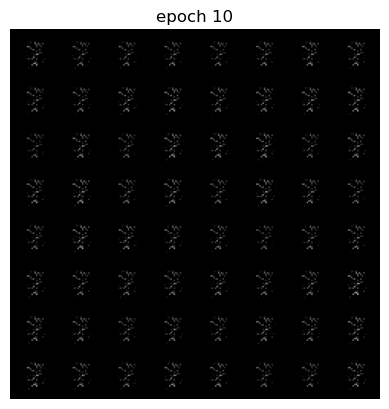

Epoch 10 of 100
Generator loss: 1.84885775, Discriminator loss: 1.44920311


118it [00:38,  3.08it/s]                         


Epoch 11 of 100
Generator loss: 1.23076407, Discriminator loss: 1.05754147


118it [00:36,  3.21it/s]                         


Epoch 12 of 100
Generator loss: 1.61888427, Discriminator loss: 1.10948261


118it [00:36,  3.20it/s]                         


Epoch 13 of 100
Generator loss: 0.74774751, Discriminator loss: 1.32250580


118it [00:36,  3.26it/s]                         


Epoch 14 of 100
Generator loss: 0.91751731, Discriminator loss: 1.18219904


118it [00:32,  3.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


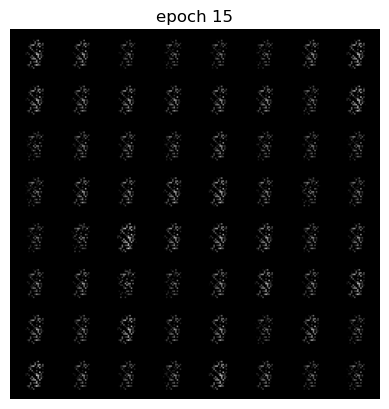

Epoch 15 of 100
Generator loss: 1.70206614, Discriminator loss: 0.83013819


118it [00:33,  3.51it/s]                         


Epoch 16 of 100
Generator loss: 4.67346277, Discriminator loss: 1.19504291


118it [00:30,  3.82it/s]                         


Epoch 17 of 100
Generator loss: 1.19291882, Discriminator loss: 1.25182337


118it [00:37,  3.18it/s]                         


Epoch 18 of 100
Generator loss: 1.29304929, Discriminator loss: 1.07467706


118it [00:35,  3.31it/s]                         


Epoch 19 of 100
Generator loss: 1.97523511, Discriminator loss: 0.94659692


118it [00:33,  3.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


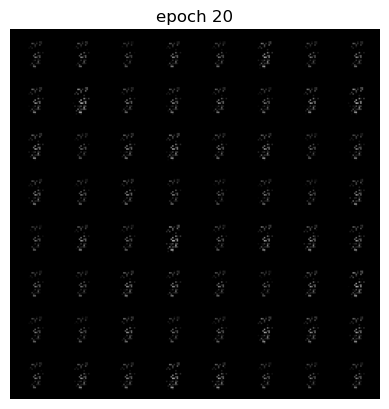

Epoch 20 of 100
Generator loss: 1.63493663, Discriminator loss: 0.96637726


118it [00:33,  3.50it/s]                         


Epoch 21 of 100
Generator loss: 2.73278934, Discriminator loss: 0.80718668


118it [00:33,  3.52it/s]                         


Epoch 22 of 100
Generator loss: 2.43273935, Discriminator loss: 0.69507779


118it [00:36,  3.26it/s]                         


Epoch 23 of 100
Generator loss: 2.37411421, Discriminator loss: 0.78672366


118it [00:35,  3.29it/s]                         


Epoch 24 of 100
Generator loss: 2.46771007, Discriminator loss: 0.62554027


118it [00:33,  3.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


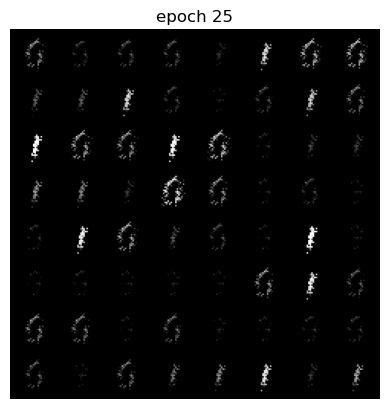

Epoch 25 of 100
Generator loss: 2.48011547, Discriminator loss: 0.49791546


118it [00:35,  3.36it/s]                         


Epoch 26 of 100
Generator loss: 2.54383746, Discriminator loss: 0.38732793


118it [00:32,  3.59it/s]                         


Epoch 27 of 100
Generator loss: 3.22851806, Discriminator loss: 0.34883338


118it [00:30,  3.82it/s]                         


Epoch 28 of 100
Generator loss: 3.14172514, Discriminator loss: 0.53121732


118it [00:30,  3.90it/s]                         


Epoch 29 of 100
Generator loss: 2.20389406, Discriminator loss: 0.70539973


118it [00:30,  3.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


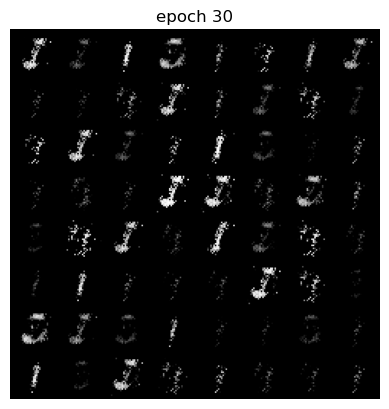

Epoch 30 of 100
Generator loss: 2.75459273, Discriminator loss: 0.44378039


118it [00:30,  3.81it/s]                         


Epoch 31 of 100
Generator loss: 3.09114490, Discriminator loss: 0.43962043


118it [00:30,  3.83it/s]                         


Epoch 32 of 100
Generator loss: 3.37448739, Discriminator loss: 0.41276839


118it [00:31,  3.69it/s]                         


Epoch 33 of 100
Generator loss: 3.35539598, Discriminator loss: 0.46615634


118it [00:29,  3.98it/s]                         


Epoch 34 of 100
Generator loss: 2.83003579, Discriminator loss: 0.52499915


118it [00:30,  3.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


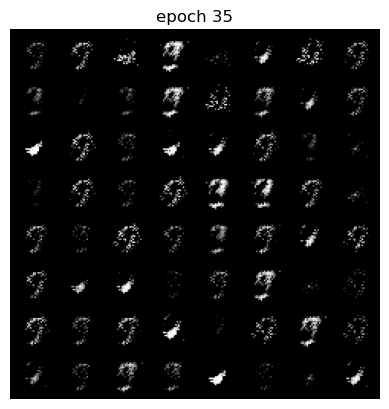

Epoch 35 of 100
Generator loss: 2.94916426, Discriminator loss: 0.55880120


118it [00:31,  3.79it/s]                         


Epoch 36 of 100
Generator loss: 2.97363356, Discriminator loss: 0.43383877


118it [00:31,  3.71it/s]                         


Epoch 37 of 100
Generator loss: 3.32747578, Discriminator loss: 0.49047834


118it [00:32,  3.63it/s]                         


Epoch 38 of 100
Generator loss: 2.85879492, Discriminator loss: 0.55863643


118it [00:30,  3.82it/s]                         


Epoch 39 of 100
Generator loss: 2.74447268, Discriminator loss: 0.57170707


118it [00:30,  3.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


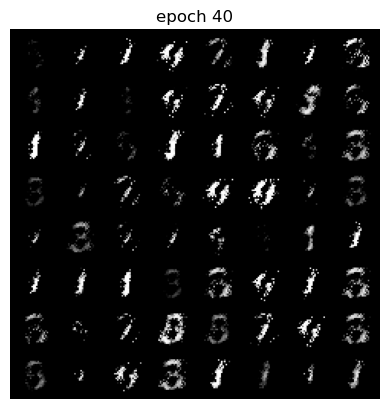

Epoch 40 of 100
Generator loss: 2.79384872, Discriminator loss: 0.65193383


118it [00:30,  3.82it/s]                         


Epoch 41 of 100
Generator loss: 2.89805890, Discriminator loss: 0.43778369


118it [00:31,  3.70it/s]                         


Epoch 42 of 100
Generator loss: 2.98467330, Discriminator loss: 0.50089166


118it [00:28,  4.10it/s]                         


Epoch 43 of 100
Generator loss: 2.93769376, Discriminator loss: 0.58978238


118it [00:26,  4.44it/s]                         


Epoch 44 of 100
Generator loss: 2.71743803, Discriminator loss: 0.61583563


118it [00:27,  4.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


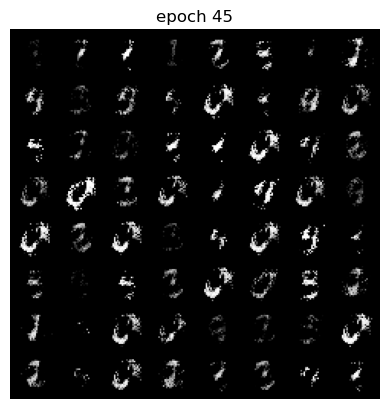

Epoch 45 of 100
Generator loss: 2.77729155, Discriminator loss: 0.54383436


118it [00:26,  4.41it/s]                         


Epoch 46 of 100
Generator loss: 2.97394536, Discriminator loss: 0.45694480


118it [00:26,  4.38it/s]                         


Epoch 47 of 100
Generator loss: 3.01674309, Discriminator loss: 0.51279891


118it [00:26,  4.45it/s]                         


Epoch 48 of 100
Generator loss: 2.85455795, Discriminator loss: 0.55002762


118it [00:26,  4.42it/s]                         


Epoch 49 of 100
Generator loss: 2.78356735, Discriminator loss: 0.46998587


118it [00:26,  4.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


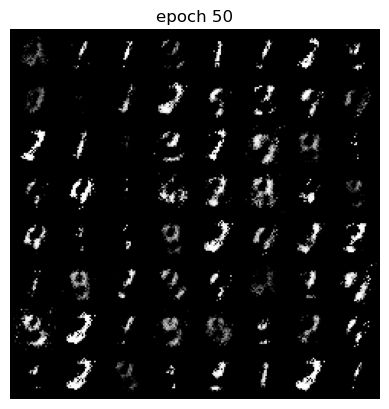

Epoch 50 of 100
Generator loss: 2.64442717, Discriminator loss: 0.64320848


118it [00:25,  4.60it/s]                         


Epoch 51 of 100
Generator loss: 2.53015626, Discriminator loss: 0.58771911


118it [00:26,  4.53it/s]                         


Epoch 52 of 100
Generator loss: 2.90395875, Discriminator loss: 0.48836245


118it [00:26,  4.46it/s]                         


Epoch 53 of 100
Generator loss: 3.18263279, Discriminator loss: 0.50579970


118it [00:26,  4.46it/s]                         


Epoch 54 of 100
Generator loss: 3.14366967, Discriminator loss: 0.58344557


118it [00:26,  4.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


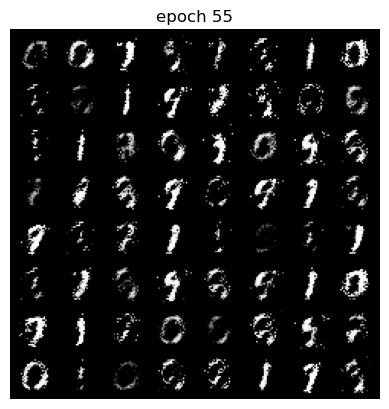

Epoch 55 of 100
Generator loss: 3.05995291, Discriminator loss: 0.51979252


118it [00:26,  4.45it/s]                         


Epoch 56 of 100
Generator loss: 3.43907801, Discriminator loss: 0.43883154


118it [00:26,  4.43it/s]                         


Epoch 57 of 100
Generator loss: 3.16056052, Discriminator loss: 0.45202527


118it [00:26,  4.40it/s]                         


Epoch 58 of 100
Generator loss: 3.23033578, Discriminator loss: 0.41671903


118it [00:26,  4.40it/s]                         


Epoch 59 of 100
Generator loss: 3.30360554, Discriminator loss: 0.41195838


118it [00:26,  4.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


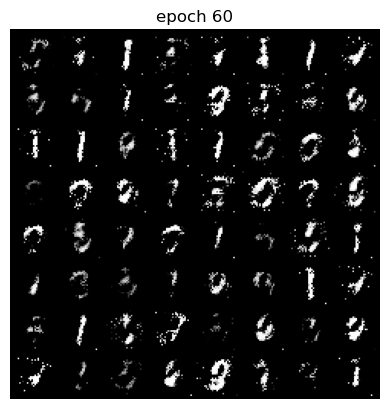

Epoch 60 of 100
Generator loss: 3.18230866, Discriminator loss: 0.48618280


118it [00:26,  4.39it/s]                         


Epoch 61 of 100
Generator loss: 3.33964624, Discriminator loss: 0.43174873


118it [00:26,  4.45it/s]                         


Epoch 62 of 100
Generator loss: 3.03507355, Discriminator loss: 0.49314818


118it [00:27,  4.28it/s]                         


Epoch 63 of 100
Generator loss: 2.96288904, Discriminator loss: 0.52105446


118it [00:27,  4.28it/s]                         


Epoch 64 of 100
Generator loss: 2.86807920, Discriminator loss: 0.55640853


118it [00:27,  4.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


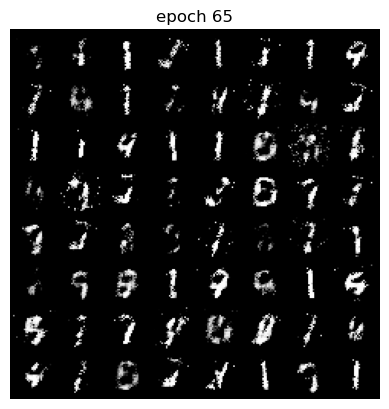

Epoch 65 of 100
Generator loss: 2.72441120, Discriminator loss: 0.54216803


118it [00:27,  4.22it/s]                         


Epoch 66 of 100
Generator loss: 2.92661374, Discriminator loss: 0.51797651


118it [00:26,  4.41it/s]                         


Epoch 67 of 100
Generator loss: 2.80537059, Discriminator loss: 0.53474588


118it [00:26,  4.50it/s]                         


Epoch 68 of 100
Generator loss: 2.62249728, Discriminator loss: 0.57493384


118it [00:26,  4.52it/s]                         


Epoch 69 of 100
Generator loss: 2.54497135, Discriminator loss: 0.59292736


118it [00:26,  4.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


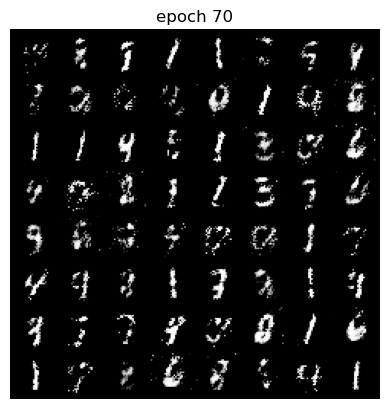

Epoch 70 of 100
Generator loss: 2.51243374, Discriminator loss: 0.58394970


118it [00:27,  4.33it/s]                         


Epoch 71 of 100
Generator loss: 2.67204925, Discriminator loss: 0.56606765


118it [00:26,  4.52it/s]                         


Epoch 72 of 100
Generator loss: 2.54023837, Discriminator loss: 0.61674368


118it [00:26,  4.43it/s]                         


Epoch 73 of 100
Generator loss: 2.42438941, Discriminator loss: 0.64575935


118it [00:26,  4.40it/s]                         


Epoch 74 of 100
Generator loss: 2.57398670, Discriminator loss: 0.59459853


118it [00:26,  4.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


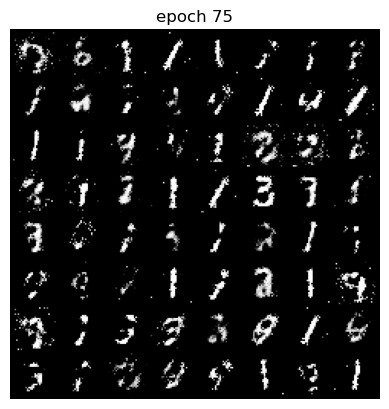

Epoch 75 of 100
Generator loss: 2.47108721, Discriminator loss: 0.60106027


118it [00:26,  4.48it/s]                         


Epoch 76 of 100
Generator loss: 2.68474943, Discriminator loss: 0.62315247


118it [00:26,  4.48it/s]                         


Epoch 77 of 100
Generator loss: 2.45831247, Discriminator loss: 0.65501268


118it [00:26,  4.44it/s]                         


Epoch 78 of 100
Generator loss: 2.56522712, Discriminator loss: 0.59875074


118it [00:25,  4.58it/s]                         


Epoch 79 of 100
Generator loss: 2.52331835, Discriminator loss: 0.61728625


118it [00:27,  4.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


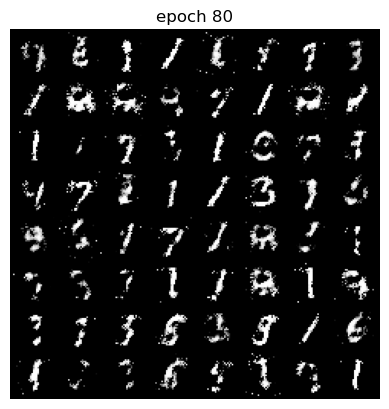

Epoch 80 of 100
Generator loss: 2.38734379, Discriminator loss: 0.61675484


118it [00:26,  4.44it/s]                         


Epoch 81 of 100
Generator loss: 2.39186653, Discriminator loss: 0.61791059


118it [00:26,  4.45it/s]                         


Epoch 82 of 100
Generator loss: 2.44836746, Discriminator loss: 0.64996901


118it [00:25,  4.54it/s]                         


Epoch 83 of 100
Generator loss: 2.42207103, Discriminator loss: 0.66539464


118it [00:26,  4.39it/s]                         


Epoch 84 of 100
Generator loss: 2.24675534, Discriminator loss: 0.68466467


118it [00:27,  4.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


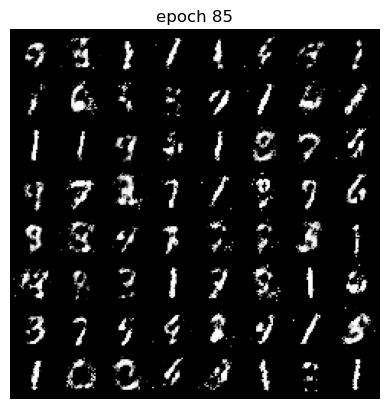

Epoch 85 of 100
Generator loss: 2.15233081, Discriminator loss: 0.70599982


118it [00:27,  4.23it/s]                         


Epoch 86 of 100
Generator loss: 2.16222695, Discriminator loss: 0.71042663


118it [00:26,  4.46it/s]                         


Epoch 87 of 100
Generator loss: 2.23945477, Discriminator loss: 0.71961530


118it [00:27,  4.31it/s]                         


Epoch 88 of 100
Generator loss: 2.20464391, Discriminator loss: 0.73859967


118it [00:27,  4.35it/s]                         


Epoch 89 of 100
Generator loss: 2.15559602, Discriminator loss: 0.71071807


118it [00:26,  4.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


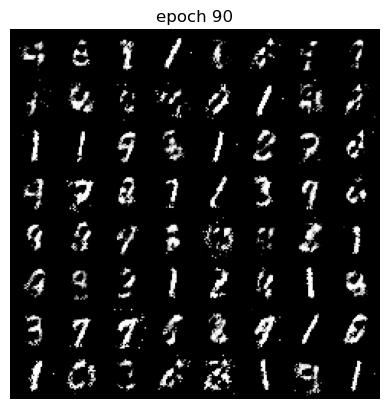

Epoch 90 of 100
Generator loss: 2.27722954, Discriminator loss: 0.67155295


118it [00:27,  4.36it/s]                         


Epoch 91 of 100
Generator loss: 2.21809834, Discriminator loss: 0.74556967


118it [00:27,  4.34it/s]                         


Epoch 92 of 100
Generator loss: 2.08830775, Discriminator loss: 0.75390857


118it [00:26,  4.40it/s]                         


Epoch 93 of 100
Generator loss: 2.09846258, Discriminator loss: 0.76056627


118it [00:29,  4.01it/s]                         


Epoch 94 of 100
Generator loss: 2.01980804, Discriminator loss: 0.77365713


118it [00:27,  4.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


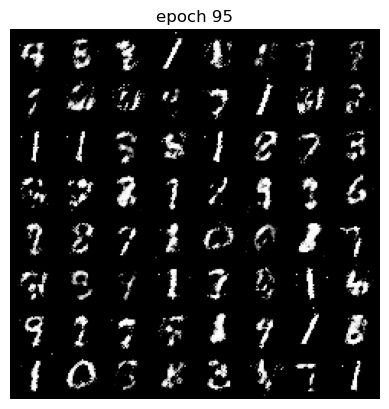

Epoch 95 of 100
Generator loss: 2.06798233, Discriminator loss: 0.76998671


118it [00:26,  4.42it/s]                         


Epoch 96 of 100
Generator loss: 2.03386578, Discriminator loss: 0.77344265


118it [00:26,  4.48it/s]                         


Epoch 97 of 100
Generator loss: 1.97130341, Discriminator loss: 0.76773179


118it [00:26,  4.39it/s]                         


Epoch 98 of 100
Generator loss: 1.94604976, Discriminator loss: 0.77986044


118it [00:27,  4.28it/s]                         


Epoch 99 of 100
Generator loss: 1.90875556, Discriminator loss: 0.82044614


118it [00:21,  5.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


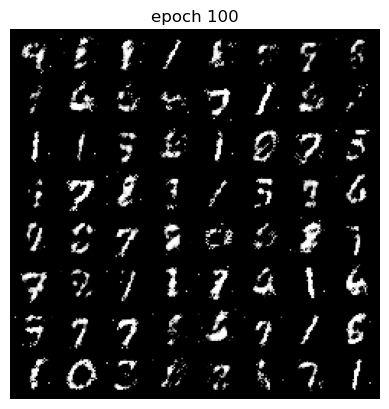

Epoch 100 of 100
Generator loss: 1.89048942, Discriminator loss: 0.83126276


In [90]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        
        # train discriminator
        for _ in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output_real = discriminator(data_real)
            loss_real = discriminator_loss(output_real, real_label)
            output_fake = discriminator(data_fake)
            loss_fake = discriminator_loss(output_fake, fake_label)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()
            loss_d += loss_real.detach().numpy() + loss_fake.detach().numpy()

        # train generator
        data_fake = generator(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        loss = generator_loss(output, real_label)
        loss.backward()
        optim_g.step()
        loss_g += loss.detach().numpy()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [91]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [92]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

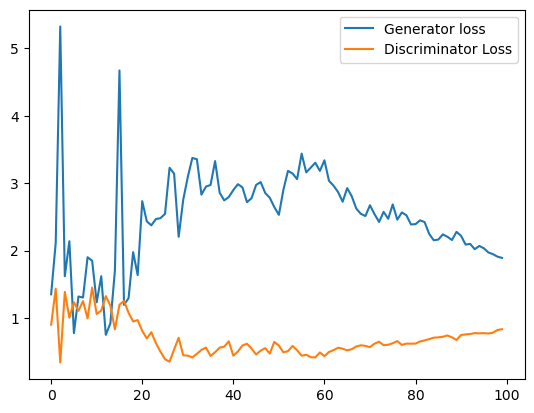

In [93]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')